In [13]:
# Only needed when FGEM is NOT installed by user
import sys
sys.path.insert(1, '../')

from fgem.world import World
from fgem.utils.config import get_config_from_json
from tqdm.notebook import tqdm

In [14]:
# Read configuration file
config = get_config_from_json('configs/exampleA.json')

project = World(config)

# Iterate over project lifetime
for i in tqdm(range(project.max_simulation_steps-1)):
    project.step_update_record()

# Compute economics and summary results
project.compute_economics()

# Visualize results
# project.viz_results()

  0%|          | 0/352 [00:00<?, ?it/s]

In [15]:
project.reservoir_simulator_settings

{'fast_mode': False,
 'period': 31536000,
 'accuracy': 1,
 'DynamicFluidProperties': True,
 'time_passed': inf}

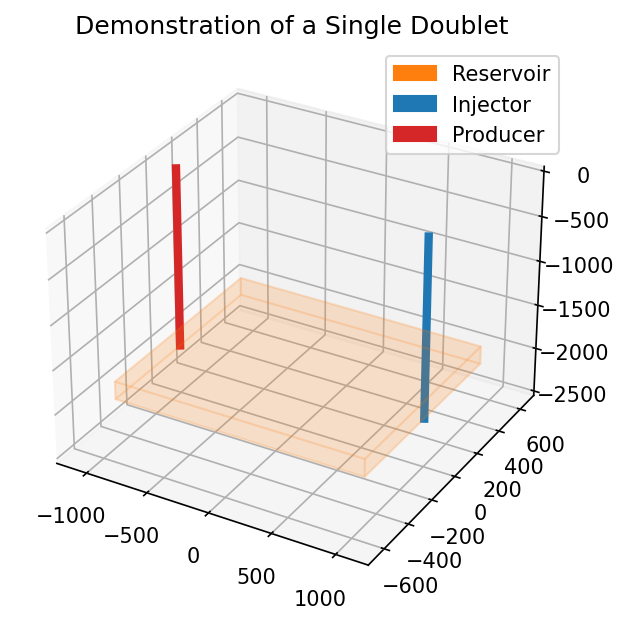

In [16]:
fig = project.reservoir.plot_doublet()

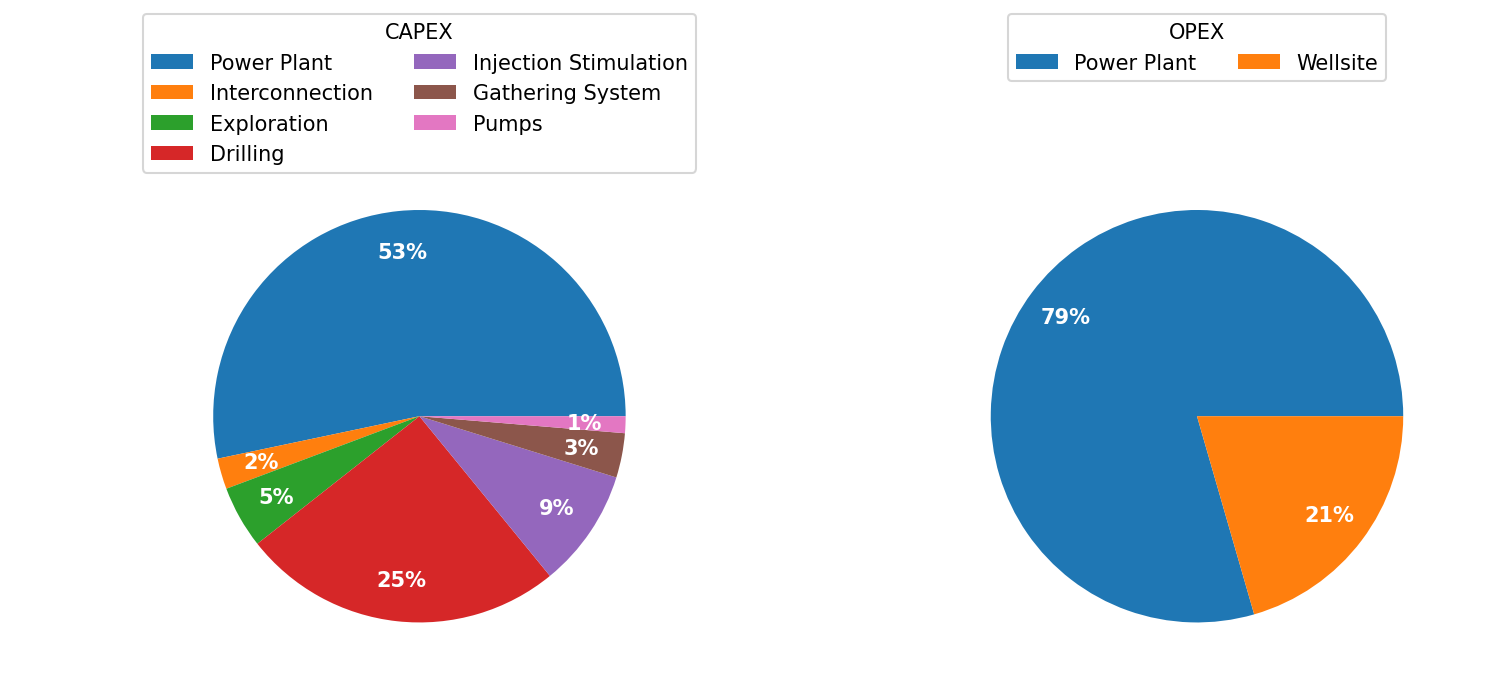

In [5]:
fig = project.plot_economics()

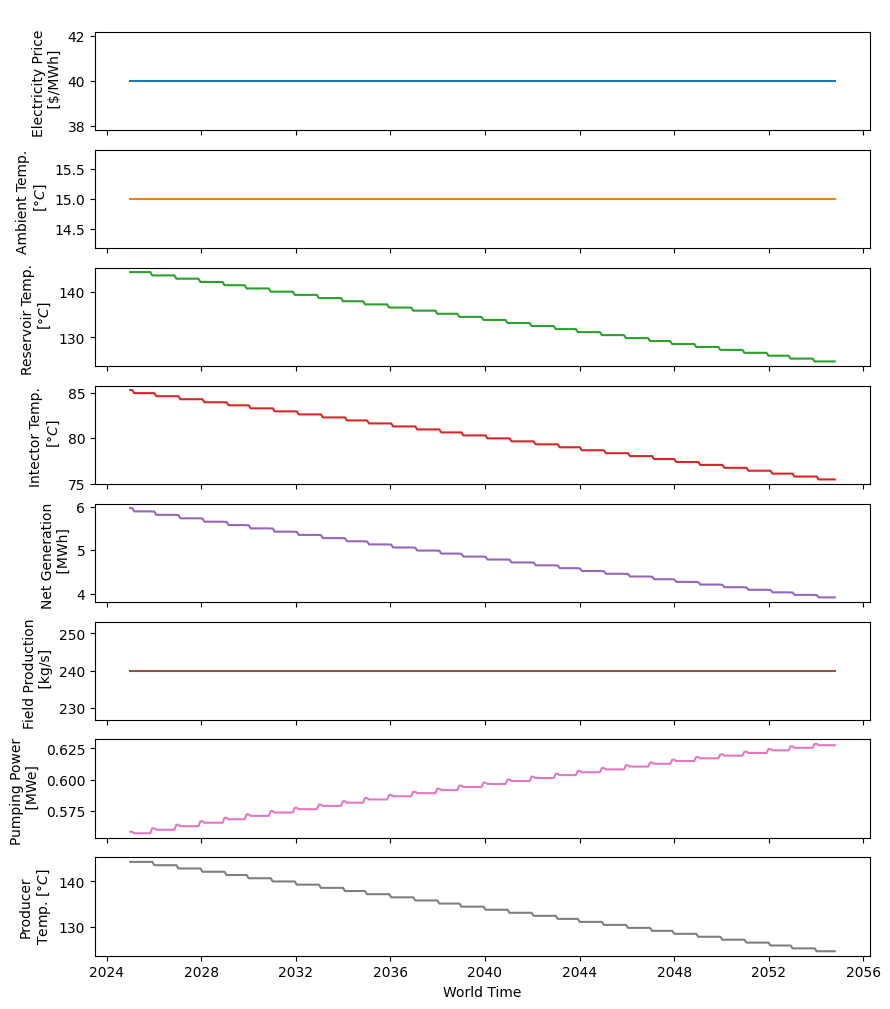

In [6]:
fig = project.plot_operations()